In [38]:
import os
import sys
import numpy as np
from PIL import Image
import pillow_heif
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
plt.rcParams["figure.figsize"] = (10, 12)

In [89]:
IMAGE_SIZE = (500, 500)
# Размер границ контура
THRESHOLD_VALUE = 195
MAX_VALUE = 255
# Инверсия порога
INV_THRESHOLD_VALUE = 50
INV_MAX_VALUE = 255
# Хитрые детали
THRESHOLD1 = 100
THRESHOLD2 = 70
# Свойство контура
CON_COLOR = (0, 0, 255)
CON_THICKNESS = 1
# Свойства стека изображений
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (0, 0, 255)
STACK_IMG_SIZE = (200, 200)

#### Чтение файлов

In [42]:
heics = list()
for path in Path('../Photos/').rglob('*.HEIC'):
    heics.append(np.asarray(pillow_heif.read_heif(f'../Photos/{path}')))

In [47]:
heics[0].shape

(4032, 3024, 3)

In [ ]:
heics_gray = list()
for item in heics:
    heics_gray.append(cv2.cvtColor(item, cv2.GRAY))

In [95]:
image = cv2.resize(heics[-1], IMAGE_SIZE)
image = cv2.GaussianBlur(heics[-1], (3, 3), 0)

In [110]:
image2 = cv2.resize(heics[2], IMAGE_SIZE)
image2 = cv2.GaussianBlur(heics[2], (3, 3), 0)

In [97]:
ret, thresh_basic = cv2.threshold(cv2.cvtColor(image, getattr(cv2,'COLOR_BGR2' + 'XYZ')), 
                                  THRESHOLD_VALUE, MAX_VALUE, cv2.THRESH_BINARY)

In [111]:
ret2, thresh_basic2 = cv2.threshold(cv2.cvtColor(image2, getattr(cv2,'COLOR_BGR2' + 'XYZ')), 
                                  THRESHOLD_VALUE, MAX_VALUE, cv2.THRESH_BINARY)

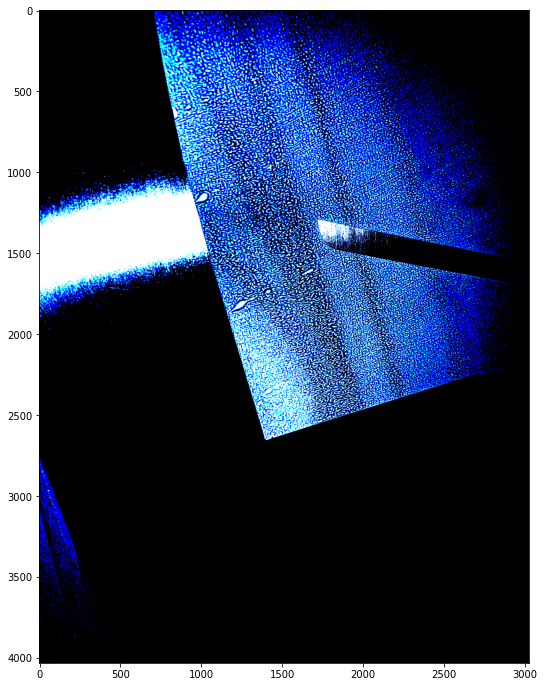

In [112]:
plt.imshow(thresh_basic2);

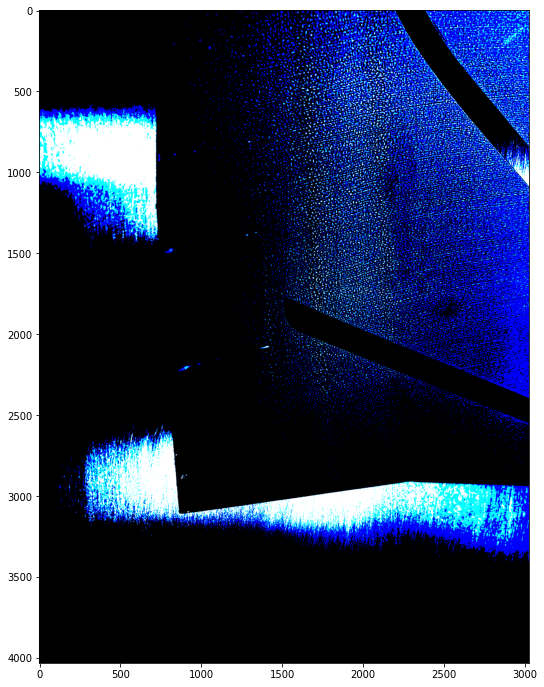

In [90]:
plt.imshow(thresh_basic);

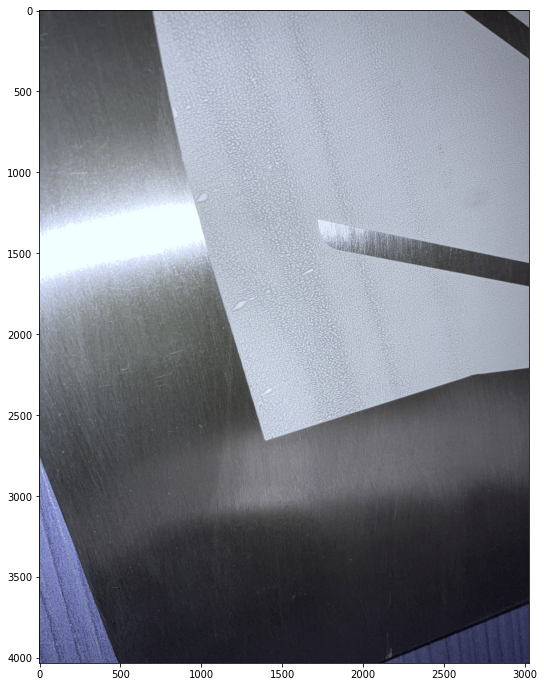

In [106]:
color_spaces = ('RGB','GRAY','HSV','LAB','XYZ','YUV')
plt.imshow(cv2.cvtColor(heics[2], getattr(cv2,'COLOR_BGR2' + 'XYZ')));

In [3]:
heif_file = pillow_heif.read_heif('../Photos/IMG_1846.HEIC')

#### Конверт в png

In [7]:
#heif_file = pillow_heif.read_heif('../Photos/IMG_1846.HEIC')
#image = Image.frombytes(
#    heif_file.mode,
#    heif_file.size,
#    heif_file.data,
#    "raw",
#)
#image.save("../Photos/img_1846.png", format("png"))

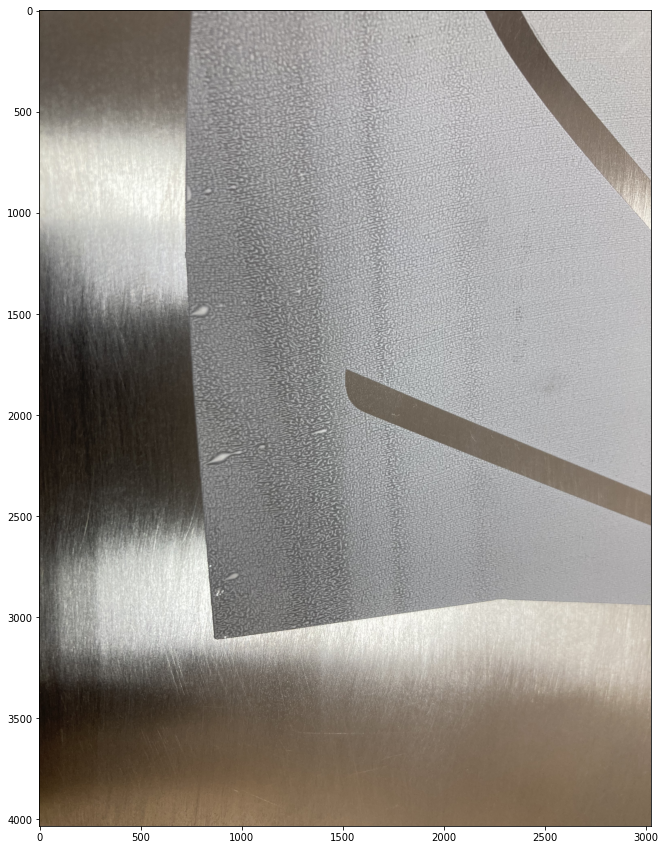

In [34]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.imshow(heics[len(heics) - 1]);

#### Поиск контуров

In [114]:
photo = heics[-1]
ret, thresh = cv2.threshold(photo, 127, 255, 0)
## Step #1 - Detect contours using both methods on the same image
contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

### Step #2 - Reshape to 2D matrices
contours1 = contours1[0].reshape(-1,2)
contours2 = contours2[0].reshape(-1,2)
### Step #3 - Draw the points as individual circles in the image
img1 = photo.copy()
img2 = photo.copy()

for (x, y) in contours1:
    cv2.circle(img1, (x, y), 1, (255, 0, 0), 3)

for (x, y) in contours2:
    cv2.circle(img2, (x, y), 1, (255, 0, 0), 3)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [115]:
ex = plt.imread('../Photos/example1.jpg')

In [ ]:
plt.imshow(ex);

#### True Story

Посмотреть 
https://pypi.org/project/diplib/

https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e

https://arboook.com/kompyuternoe-zrenie/operatsii-s-tsvetom-v-opencv3-i-python/

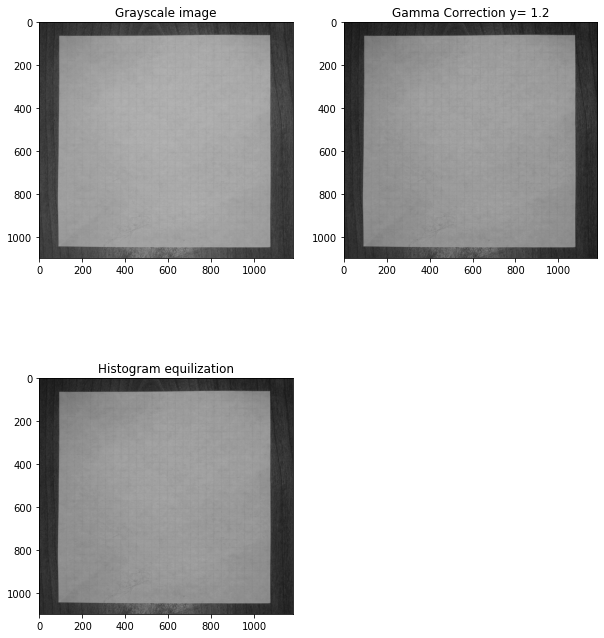

In [147]:
gray_im = cv2.cvtColor(ex, cv2.COLOR_BGR2GRAY)
plt.subplot(221)
plt.title('Grayscale image')
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)

# Contrast adjusting with gamma correction y = 1.2

gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
plt.subplot(222)
plt.title('Gamma Correction y= 1.2')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)
# Contrast adjusting with histogramm equalization
gray_equ = cv2.equalizeHist(gray_im)
plt.subplot(223)
plt.title('Histogram equilization')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255);

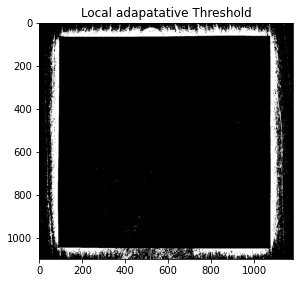

In [148]:
thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 255, 19)
thresh = cv2.bitwise_not(thresh)
plt.subplot(221)
plt.title('Local adapatative Threshold')
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255);
#plt.subplot(222)
#thresh = cv2.bitwise_not(thresh)
#plt.title('Local adapatative Threshold')
#plt.imshow(thresh, cmap="gray", vmin=0, vmax=255);

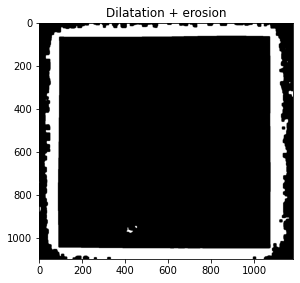

In [149]:
# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv.dilate(thresh, kernel, iterations=1)
img_erode = cv.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv.medianBlur(img_erode, 7)
plt.subplot(221)
plt.title('Dilatation + erosion')
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255);

objects number is: 11


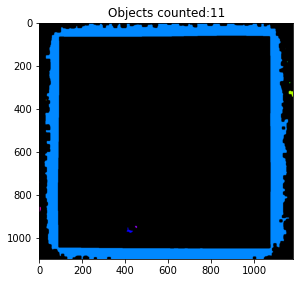

In [150]:
# Labeling
ret, labels = cv.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()